# Sleep Data Analysis

In this project, I will analyze sleep data collected from a CPAP (Continuous Positive Airway Pressure) machine. The data contains various measures of sleep quality, such as flow, pressure, sleep times, snoring, and obstructed breathing. My goal is to gain insights into the patterns and trends in this data, in order to better understand the nature of sleep and its impact on my health and wellbeing.

The following sections will walk through the process of importing and cleaning the sleep data, conducting exploratory data analysis, and drawing conclusions based on the results. So let's get started!

In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly
from sqlalchemy import create_engine, text
import datetime

In [51]:
def connect_to_db():
    host = os.environ.get("DB_HOST")
    user = os.environ.get("DB_USER")
    password = os.environ.get("DB_PASSWORD")

    engine = create_engine(f"postgresql://{user}:{password}@{host}:5432/CPAP")
    return engine

engine = connect_to_db()

In [53]:
# Define the query with a parameter placeholder for the column name
column_name = 'flow'

query = query = text(f"""
SELECT time, {column_name}
FROM waveview_mat
WHERE time BETWEEN :start_date AND :end_date
ORDER BY time ASC
""")

# Define the start and end dates
start_date = datetime.datetime(2023, 1, 10, 12, 0, 0)
end_date = datetime.datetime(2023, 1, 11, 12, 0, 0)

# Execute the query with the column name and date range as parameters
with engine.connect() as conn:
    result = conn.execute(query, start_date=start_date, end_date=end_date)
    df = pd.DataFrame(result.fetchall(), columns=result.keys())

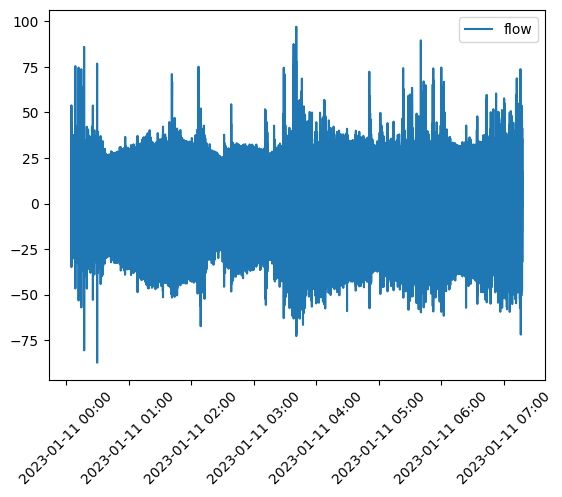

In [54]:
df["time"] = pd.to_datetime(df["time"])
time = df["time"]
flow = df[value]
plt.plot(time, flow, label=value)
plt.legend()

# Set the date format of the tick marks
date_fmt = mdates.DateFormatter('%Y-%m-%d %H:%M')
plt.gca().xaxis.set_major_formatter(date_fmt)

plt.xticks(rotation=45)
plt.show()



In [ ]:
conn.dispose()